## Simple Linear Regression - example1

In [15]:
# 데이터 구성 : Series, DataFrame
import pandas as pd

# 행렬 연산
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family = "Malgun Gothic")
matplotlib.rcParams['axes.unicode_minus'] = False

# 회귀분석
from statsmodels.formula.api import ols

# qqplot, 회귀분석에 상수항 추가
from statsmodels.api import qqplot, add_constant

# 선형 모델 formula(y = X1 + X2 + ...)
import statsmodels.formula.api as smf

# 평가함수
from statsmodels.tools.eval_measures import rmse

# jupyter notebook 사용 시 그래프 자동 출력 옵션
%matplotlib inline

In [2]:
# 파일명, 변수, 값 등에 한글 포함시 engine = "python" 지정
df_raw = pd.read_csv("data/부품수리시간.csv", engine = "python")
df_raw.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


## 데이터 설명
- MINUTES(목표변수, 연속형) : 수리 소요시간
- UNITS(목표변수, 연속형) : 부품 수

In [3]:
# 요약 통계량
df_raw.describe().round(3)

,UNITS,MINUTES
count,14.000,14.000
mean,6.000,97.214
std,2.961,46.217
min,1.000,23.000
25%,4.000,66.500
50%,6.000,96.500
75%,8.750,138.500
max,10.000,166.000


## 변수 간 경향성 파악

<AxesSubplot:xlabel='UNITS', ylabel='MINUTES'>

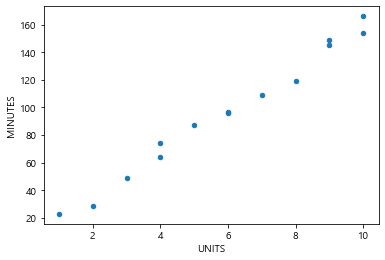

In [4]:
# 목표변수와 설명변수 산점도
df_raw.plot.scatter(x = "UNITS", y = "MINUTES")

#### ㄴ UNITS(설명변수)가 증가함에 따라 MINUTES(수리시간)도 증가

In [5]:
# 목표변수와 설명변수 상관계수
df_raw.corr(method = "pearson").round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


#### ㄴ 상관계수가 0.994로 두 변수 간 매우 높은 선형 관계가 있음

## 회귀 모델 생성

In [18]:
# 선형 회귀 분석 : formula(y - X1 + X2 +...) 이용. 상수항(Intercept)은 자동으로 추가됨
reg_model = smf.ols(formula = "MINUTES ~ UNITS", data = df_raw)
reg_result = reg_model.fit()

print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           8.92e-13
Time:                        09:57:16   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

C:\Users\user\anaconda3\envs\kongbig\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### 1. No.Observations(분석 자료 수) : 14 / Df Residuals(잔차 자유도) : 12 / Df Model(모델 자유도) : 1
#### 2. 분산분석 결과 -> p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의
#### 3. 설명력 : 0.987 -> UNITS로 MINUTES의 변동의 98.7%을 설명할 수 있음
#### 4. 회귀계수 검정 -> 절편의 유의성은 검토하지 않음, 회귀식에서는 절편의 유의성 상관없이 절편 포함
#### -> UNITS의 p값이 유의수준 0.05보다 작으므로 유의

## 오차 기본가정 검토

### * 등분산성/독립성 검정

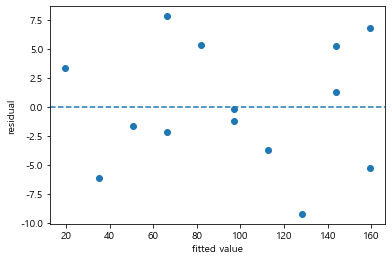

In [17]:
## 잔차 산점도 : X-예측값, Y-잔차
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

### ㄴ 잔차가 y=0을 기준으로 Random하게 산포되어 있으므로 등분산성과 독립성을 만족

### * 정규성검정

C:\Users\user\anaconda3\envs\kongbig\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=0.7464482182734603, pvalue=0.6885109139659082)

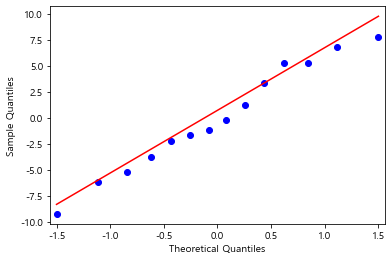

In [21]:
# 잔차 정규성 검정 : Q-Q plot, s-standardized line
# r-regression line, q-quartiles

qqplot(reg_result.resid, line = "q")

# 정규성 검정
from statsmodels.stats.stattools import omni_normtest

omni_normtest(reg_result.resid, axis = 0)

### ㄴ 정규분포 직선을 중심으로 분포하고 검정통계량이 귀무가설을 채택하므로 정규분포를 따름

## 결론 도출

### 최종회귀식
$$\hat{y} = 4.1617 + 15.5088 * Units$$
-> 부품 수가 1단위 증가할 때마다 수리 시간은 15.5088분 증가

### 부품의 수가 12개일 때 예상 수리시간은?
$$\hat{y} = 4.1617 + 15.5088 * 12 = 190.263 Minutes$$